# CS429: Information Retrieval

<br>

## Lecture 19: Clustering

<br>

### Dr. Aron Culotta
### Illinois Institute of Technology

Recall classification problem notation:


- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=-1$: not spam
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.

** Training data:**

We are given training data $D = \{(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n)\}$

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|

How to classify a new instance?  
 "free money" -> $\{1,1\}$


**In clustering, we don't get any labels!**


||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||?| 
|$x_2$|1|0||?|
|$x_3$|1|1||?|
|$x_4$|1|0||?|
|$x_5$|1|1||?|
|$x_6$|0|0||?|
|$x_7$|0|1||?|

**What can we possibly hope to learn using only X??**

- **Patterns of features**: E.g., the terms "free", "money", and "credit" often appear together
- **Patterns of documents**: E.g., these 1,000 emails all look pretty similar

<br><br><br><br><br>
**Why do this?**
- Helps the user explore/visualize data
  - E.g., lawyers looking for criminal activity in [Enron emails](https://en.wikipedia.org/wiki/Enron_scandal)
  - Bioligists looking for patterns in DNA
- May help as a preprocessing step for supervised learning
  - Reduce dimensionality of feature vectors
  - Provide more predictive features than raw features

**Today**: Document clustering

**Types of document clustering**:

- Flat clustering

![flat](images/clustering.gif)
[source](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/images/clustering.gif)

<br><br><br>

- Hierarchical clustering

![hclust](images/hclust.png)
[source](http://cs.jhu.edu/~razvanm/fs-expedition/tux3.html)

<br><br><br>

- Hard vs. soft clustering
![soft](images/soft.png)
[source](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/images/clustering.gif)

**Flat Clustering: Problem statement**

Input:
- documents $D = \{d_1 \ldots d_N\}$
- desired number of clusters $K$
- **objective function** that evaluates quality of clustering

Output:
- An assignment $\gamma : D \rightarrow \{1, \ldots, K\}$ that optimizes the objective function

**Similar to our gradient descent recipe:**

1. pick a model
2. pick an error function
3. minimize that error function

**But**, what is a good objective function?

<br><br><br><br><br><br>

**K-Means**
- Identify $K$ **cluster centers**
- Minimize distance from each document to its assigned cluster center.

![kmeans](images/kmeans.png)
[source](http://blog.mpacula.com/2011/04/27/k-means-clustering-example-python/)

- Each cluster center represented by one **mean vector** $ \in \{\mu_1 \ldots \mu_K\}$
  - $\mu_i \in \mathbb{R}^V$ if $V$ terms in vocabulary
- Each document $x$ associated with exactly one mean vector (hard clustering)


**K-Means** Algorithm Overview

1. Pick $K$ mean vectors at random
2. Iterate until convergence:
  1. Assign each document $x_i$ to its closest mean vector $\mu_j$
  2. Update each mean vector $\mu_j$ to be the mean of the $x_i$'s assigned to it

**K-means objective**

- Let $M = \{\mu_1 \ldots \mu_K\}$ be the set of mean vectors.
- Let $r_{ij} = 1$ if $x_i$ belongs to cluster $j$, otherwise 0.

$$E(D, M) = \sum_{i=1}^N \sum_{j=1}^K r_{ij} d(x_i, \mu_j)$$

= "sum of distances from each document to its assigned cluster center."

So, optimal clustering is:

$$M^* \leftarrow \mathop{\rm argmin}_M E(D, M)$$

**Distance $d$?**

E.g., Euclidean:

$$d(x_i, \mu_j) = \sqrt{\sum_{p=1}^V (x_{ip} - \mu_{jp})^2}$$

E.g.:

- $x_i = \{1,2,3\}$
- $\mu_j = \{1, 4, 1\}$
- $d(x_i, \mu_j) = \sqrt{(1-1)^2 + (2-4)^2 + (3-1)^2} = 8$

**K-Means** is a **greedy** algorithm to minimize $E$

![kmeansalg](images/kmeansalg.png)

**Not guaranteed to find global optimum!**

![nonconvex](images/nonconvex.png)
[source](http://sebastianraschka.com/faq/docs/visual-backpropagation.html)

**K-Means is sensitive to initialization**

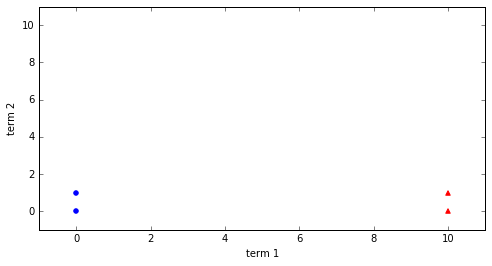

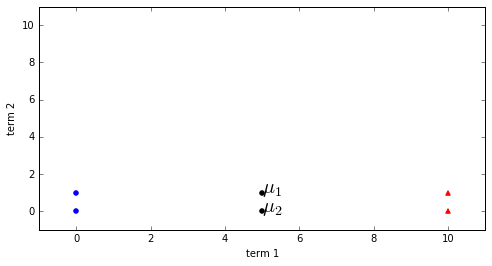

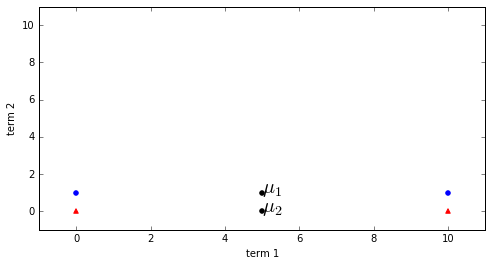

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4))
plt.scatter([0,0], [0, 1], color='b')
plt.scatter([10,10], [0, 1], color='r', marker='^')
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.xlabel('term 1')
plt.ylabel('term 2')
plt.show()

plt.figure(figsize=(8,4))
plt.scatter([0,0], [0, 1], color='b')
plt.scatter([10,10], [0, 1], color='r', marker='^')
plt.annotate('$\mu_1$', xy=(5,1), size=20)
plt.scatter([5], [1], color='k')
plt.annotate('$\mu_2$', xy=(5,0), size=20)
plt.scatter([5], [0], color='k')
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.xlabel('term 1')
plt.ylabel('term 2')
plt.show()

plt.figure(figsize=(8,4))
plt.scatter([0,10], [1, 1], color='b')
plt.scatter([0,10], [0, 0], color='r', marker='^')
plt.annotate('$\mu_1$', xy=(5,1), size=20)
plt.scatter([5], [1], color='k')
plt.annotate('$\mu_2$', xy=(5,0), size=20)
plt.scatter([5], [0], color='k')
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.xlabel('term 1')
plt.ylabel('term 2')
plt.show()

**Simple solution**
- Run K-Means many times with different initialization
  - pick one with lowest cost
  
OR

- Pick initial means to be well-dispersed in data
  - E.g., Each mean is set to an some existing point
  - To pick new mean, pick a point $x$ that is far away from all other previously selected points
  

**How to pick K?**

<br><br><br><br>
Look for the knee!
![knee](images/knee.png)

E.g., at K=4 and K=9

How do we know k-means actually minimizes the error function?

We can compute gradient w.r.t. $M$, just like we did for logistic regression.

$$E(D, M) = \sum_{i=1}^N \sum_{j=1}^K r_{ij} d(x_i, \mu_j)$$

$$\frac{\partial E(D, M)}{\partial \mu_{jp}} = \sum_{x_i \in C_j} 2(\mu_{jp} - x_{ip}) $$
where $C_j$ is the set of documents assigned to cluster $j$

Setting this derivative to zero, we get the following update:

$$\mu_{jp} = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_{ip}$$

which is just the average frequency of term $p$ for documents in cluster $j$.

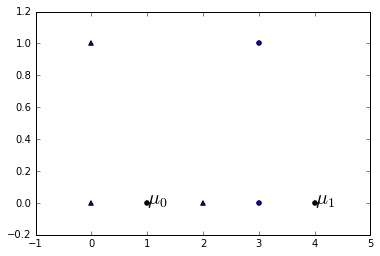

In [43]:
# Here's an example. 
# Exercise: work out the means/cluster assignments
# until convergence.
def plot(points, cluster_assignments, means):
    plt.figure()
    for point, asg in zip(points, cluster_assignments):
        plt.scatter([point[0]], [point[1]], marker='o' if asg==1 else '^')
    for i, m in enumerate(means):
        plt.annotate('$\mu_%d$' % i, xy=m, size=20)
        plt.scatter([m[0]], [m[1]], color='k')
    plt.show()
    
plot([(0, 0), (0, 1), (2, 0), (3,1), (3,0)], [0,0,0,1,1], [(1,0), (4,0)])